<a href="https://colab.research.google.com/github/parulnith/Building-a-Conversational-Chatbot-for-Slack-using-Rasa-and-Python/blob/master/Conversational_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Conversational Chatbot for Slack using Rasa and Python -Part 1

## Starting Jupyter Notebook with necessary imports

In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')



# Installations
* Rasa NLU
* Rasa Core
* SpaCy Language Model

In [3]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy];

    100% |████████████████████████████████| 133kB 6.1MB/s 
    100% |████████████████████████████████| 153kB 13.5MB/s 
    100% |████████████████████████████████| 307kB 17.3MB/s 
    100% |████████████████████████████████| 71kB 25.0MB/s 
    100% |████████████████████████████████| 49.1MB 666kB/s 
    100% |████████████████████████████████| 665kB 16.5MB/s 
    100% |████████████████████████████████| 61kB 23.5MB/s 
    100% |████████████████████████████████| 993kB 15.5MB/s 
    100% |████████████████████████████████| 71kB 23.8MB/s 
    100% |████████████████████████████████| 51kB 21.5MB/s 
    100% |████████████████████████████████| 4.9MB 6.6MB/s 
    100% |████████████████████████████████| 81kB 22.7MB/s 
    100% |████████████████████████████████| 22.0MB 1.5MB/s 
    100% |████████████████████████████████| 3.1MB 10.4MB/s 
    100% |████████████████████████████████| 204kB 27.8MB/s 
    100% |████████████████████████████████| 81kB 24.1MB/s 
    100% |████████████████████████████████| 3.1M

In [4]:
!{python} -m spacy download en_core_web_md

    100% |████████████████████████████████| 120.9MB 61.3MB/s 
  Running setup.py install for en-core-web-md ... - \ | / - \ | / - \ | / - \ done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



## Downloading the English Language Model

In [5]:
!{python} -m spacy link en_core_web_md en --force;


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



# Importing the Installations

In [0]:
import rasa_nlu
import rasa_core
import spacy



# 1. Teaching the bot to understand user inputs using Rasa NLU

## Preparing the NLU Training Data

In [9]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- Quite bad - can I get a cute picture of a [bird](group:birds), please?
- Really bad and only [doggo](group:shibes) pics and change that.
- Not good. The only thing that could make me fell better is a picture of a cute [kitten](group:cats).
- so sad. Only the picture of a [puppy](group:shibes) could make it better.
- I am very sad. I need a [cat](group:cats) picture.
- Extremely sad. Only the cute [doggo](group:shibes) pics can make me feel better.
- Bad. Please show me a [bird](group:birds) pic!
- Pretty bad to be honest. Can you show me a [puppy](group:shibes) picture to make me fell better?

## intent: inform
- A [dog](group:shibes)
- [dog](group:shibes)
- [bird](group:birds)
- a [cat](group:cats)
- [cat](group:cats)
- a [bird](group:birds)
- of a [dog](group:shibes)
- of a [cat](group:cats)
- a [bird](group:birds), please
- a [dog](group:shibes), please
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


## Defining the NLU Model Configuration

In [10]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


## Training the NLU Model.

In [11]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'greet', 'mood_deny', 'mood_great', 'mood_affirm', 'mood_unhappy', 'goodbye', 'inform'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


## Evaluating the NLU model on a random text

In [22]:
# A helper function for prettier output

def pprint(o):   
    print(json.dumps(o, indent=2))
    
pprint(interpreter.parse("I am very sad. Could you send me a cat picture? "))

{
  "intent": {
    "name": "mood_unhappy",
    "confidence": 0.7165062638624508
  },
  "entities": [
    {
      "start": 35,
      "end": 38,
      "value": "cats",
      "entity": "group",
      "confidence": 0.9543162015604525,
      "extractor": "ner_crf",
      "processors": [
        "ner_synonyms"
      ]
    }
  ],
  "intent_ranking": [
    {
      "name": "mood_unhappy",
      "confidence": 0.7165062638624508
    },
    {
      "name": "goodbye",
      "confidence": 0.07658387975889518
    },
    {
      "name": "mood_great",
      "confidence": 0.0747897961451117
    },
    {
      "name": "greet",
      "confidence": 0.04438568373413862
    },
    {
      "name": "inform",
      "confidence": 0.032039203858483946
    },
    {
      "name": "mood_affirm",
      "confidence": 0.028217121964221097
    },
    {
      "name": "mood_deny",
      "confidence": 0.027478050676699096
    }
  ],
  "text": "I am very sad. Could you send me a cat picture? "
}


## Evaluating the NLU model on a test data
(Here we are using the data at hand i.e nlu.md but it isr recommended to use unseen data)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'greet', 'mood_deny', 'mood_great', 'mood_affirm', 'mood_unhappy', 'goodbye', 'inform'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 85 examples that have a defined intent out of 85 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9881730469965763
INFO:rasa_nlu.evaluate:Precision: 0.9890756302521008
INFO:rasa_nlu.evaluate:Accuracy:  0.9882352941176471
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

     goodbye       1.00      0.91      0.95        11
       greet       0.93      1.00      0.96        13
      inform    

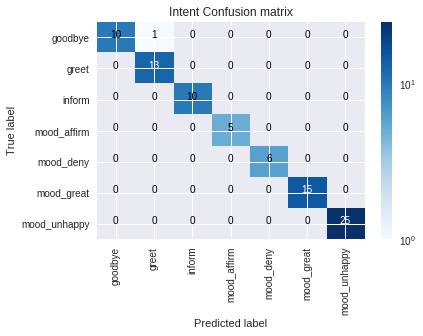

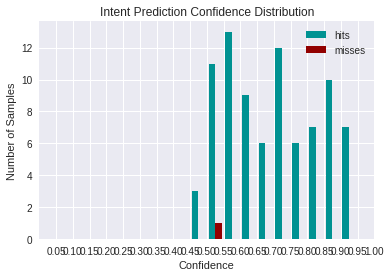

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

      group       1.00      1.00      1.00        18
  no_entity       1.00      1.00      1.00       265

avg / total       1.00      1.00      1.00       283



In [13]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu.md", model_directory)

# 2. Teaching the bot to respond using Rasa Core

## 1. Writing  Stories

In [14]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_ask_picture
* inform{"animal":"dog"}  
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_picture
* inform{"group":"cat"}
  - action_retrieve_image
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## sad path 3
* greet
  - utter_greet
* mood_unhappy{"group":"puppy"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


## 2. Defining a Domain

In [15]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy
- inform

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_picture
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ask_picture:
  - text: "To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


## Custom Actions

In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('group')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")
   
        
        #display(Image(response[0], height=550, width=520))
        dispatcher.utter_message("Here is something to cheer you up: {}".format(response))

##  Visualising the Training Data

In [0]:

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz

!{python} -m pip install pygraphviz;

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 248.31it/s, # trackers=1]


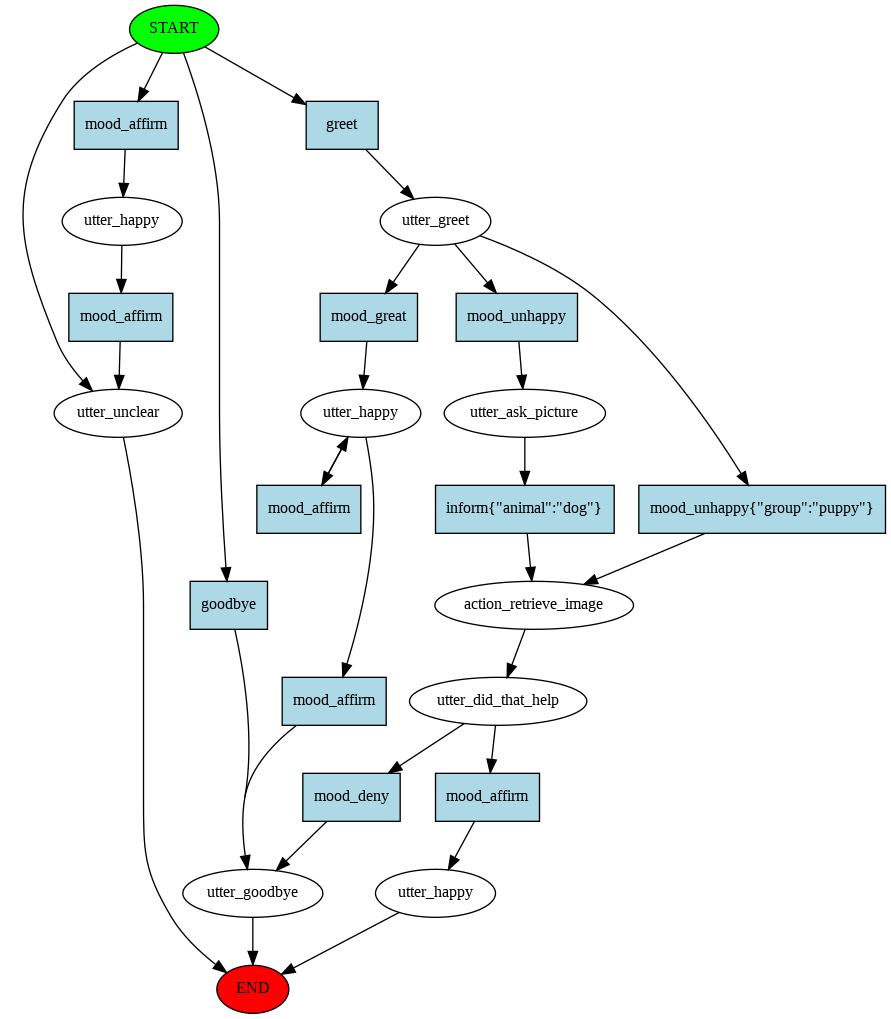

In [17]:

from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

## Training a Dialogue Model

In [18]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 113.26it/s, # trackers=15]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 241/241 [00:13<00:00, 17.45it/s, # actions=271]
INFO:rasa_core.featurizers:Created 271 action examples.
Processed actions: 271it [00:00, 307.46it/s, # examples=271]
INFO:rasa_core.policies.memoization:Memorized 271 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 241/241 [00:14<00:00, 16.52it/s, # actions=271]
INFO:rasa_core.featurizers:Created 271 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 271 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 18)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6528      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
271/271 [==============================] - 1s 2ms/step - loss: 2.1206 - acc: 0.3210
Epoch 2/200
271/271 [==============================] - 0s 193us/step - loss: 2.0129 - acc: 0.4613
Epoch 3/200
271/271 [==============================] - 0s 193us/step - loss: 1

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


# Talk to your Bot

In [19]:
#Starting the Bot

from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [24]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])
        

Your bot is ready to talk! Type your messages here or send 'stop'
Hello
Hey! How are you?
I am unhappy
To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?
yes. SHow me a cat
Here is something to cheer you up: https://cdn.shibe.online/cats/692a286d46970ae1ca8ea15910de4ce000d8d219.jpg
Did that help you?
Yes
Great carry on!
Bye
Bye
Stop
Hey! How are you?
stop
